In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
# import data
df = pd.read_csv('College_Data.csv')
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)
df

,University,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [4]:
df.drop('University', axis=1, inplace=True)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [6]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(df_scaled)
clusters

array([1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,

In [7]:
df['Clusters'] = clusters
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,2
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,1
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,2


In [8]:
df.groupby('Clusters').describe()['Enroll']

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,129.0,2386.418605,1211.611651,499.0,1565.00,2082.0,3079.00,6392.0
1,398.0,387.507538,294.384409,35.0,186.25,291.5,475.75,1701.0
2,250.0,575.852000,415.747169,51.0,306.25,469.0,694.00,2505.0


Text(0, 0.5, 'Score')

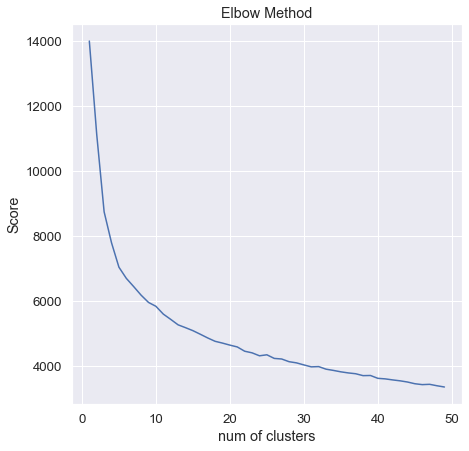

In [9]:
# choose the best number of clusters (K Value) using Elbow Method
scores = []
for i in range(1, 50):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 50), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [10]:
# from the scores, turns out the best clusters number is 5
model = KMeans(n_clusters=30)
clusters = model.fit_predict(df_scaled)
clusters

array([ 4, 12, 12, 21, 28,  4, 14, 19, 19, 12, 19, 19,  4, 19, 22, 11,  6,
       12, 28, 25, 21,  0, 26,  3, 19, 17, 29, 20, 26, 19,  4, 19, 23, 22,
        4, 26, 21, 21, 11, 20, 14,  4, 11,  4, 19, 25,  8, 26, 29,  4, 28,
        4, 28, 22, 19,  4,  0, 28,  4,  5, 27, 20, 11, 27, 21, 11, 28, 12,
       14, 24, 18,  6, 21, 26,  2, 14, 14, 11,  7,  7, 14,  8, 28, 14, 26,
       22,  6, 18, 14,  4, 14,  6, 17,  4, 29, 26, 14, 26, 11,  4, 10, 19,
       17,  0, 15,  8,  6, 11, 19, 14, 19,  4, 25, 28,  6, 19, 26,  2, 20,
       25, 14, 14,  6, 21, 26,  0, 26, 14, 11, 26, 14, 14, 14, 11, 26, 26,
       26,  6,  2, 19,  6, 20, 28, 14, 18, 28, 28,  4, 26, 21, 19, 19,  2,
       12, 12,  4, 12,  8, 18,  6, 12, 17, 19, 19, 21, 25, 22, 14, 12, 22,
       28,  2, 21, 19, 18, 19, 20,  0, 28, 12, 17,  0, 26,  8, 19, 14, 14,
       14,  8, 22, 14, 18, 15, 19, 14, 15, 29, 17, 28, 22,  2, 13,  8, 24,
        8, 29,  0, 25, 26,  4,  8,  4,  4,  2, 12, 28,  8, 12,  7,  5,  4,
       18, 24, 13, 26, 21

In [11]:
df['Clusters'] = clusters
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,4
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,12
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,12
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,21
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,25
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,14
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,4
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,18


In [12]:
data = [2000, 1200, 700, 20, 50, 2500, 90, 7000, 6000, 300, 2200, 50, 70, 20, 20, 4000, 99, 0]

In [13]:
model.predict(scaler.transform([data]))

array([17])

In [14]:
import joblib

In [16]:
joblib.dump(model, 'kmeans_model.h5')
joblib.dump(scaler, 'kmeans_scaler.h5')

['kmeans_scaler.h5']